## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with L1 = {l1r}, L2 = {l2r}")
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"exp-L1-{l1r}-L2-{l2r}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with L1 = 0.01, L2 = 0.01
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 21ms/step - loss

196/196 [==============================] - 4s 20ms/step - loss: 2.4614 - accuracy: 0.0984 - val_loss: 2.4614 - val_accuracy: 0.1000
Experiment with L1 = 0.01, L2 = 0.0001
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_____

196/196 [==============================] - 4s 20ms/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 2.4626 - accuracy: 0.0983 - val_loss: 2.4625 - val_accuracy: 0.1000
Experiment with L1 = 0.01, L2 = 1e-08
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
outp

196/196 [==============================] - 4s 20ms/step - loss: 2.4626 - accuracy: 0.0984 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 2.4626 - accuracy: 0.0967 - val_loss: 2.4625 - val_accuracy: 0.1000
Experiment with L1 = 0.01, L2 = 1e-12
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________________________

196/196 [==============================] - 4s 20ms/step - loss: 2.4626 - accuracy: 0.0996 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 2.4626 - accuracy: 0.0970 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 2.4626 - accuracy: 0.0968 - val_loss: 2.4625 - val_accuracy: 0.1000
Experiment with L1 = 0.01, L2 = 0.0
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________________________

196/196 [==============================] - 3s 16ms/step - loss: 2.4626 - accuracy: 0.0979 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 2.4626 - accuracy: 0.0971 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 2.4626 - accuracy: 0.0976 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 2.4626 - accuracy: 0.0989 - val_loss: 2.4626 - val_accuracy: 0.1000
Experiment with L1 = 0.0001, L2 = 0.01
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________

196/196 [==============================] - 4s 20ms/step - loss: 1.7652 - accuracy: 0.4783 - val_loss: 1.7957 - val_accuracy: 0.4687
Epoch 46/50
196/196 [==============================] - 4s 21ms/step - loss: 1.7633 - accuracy: 0.4804 - val_loss: 1.8347 - val_accuracy: 0.4511
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7577 - accuracy: 0.4810 - val_loss: 1.7936 - val_accuracy: 0.4588
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7550 - accuracy: 0.4826 - val_loss: 1.7968 - val_accuracy: 0.4682
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7522 - accuracy: 0.4810 - val_loss: 1.7918 - val_accuracy: 0.4669
Epoch 50/50
196/196 [==============================] - 4s 21ms/step - loss: 1.7489 - accuracy: 0.4825 - val_loss: 1.8269 - val_accuracy: 0.4559
Experiment with L1 = 0.0001, L2 = 0.0001
Model: "functional_1"
_________________________________________________________________
Layer (type)       

196/196 [==============================] - 4s 20ms/step - loss: 2.8472 - accuracy: 0.6145 - val_loss: 3.1224 - val_accuracy: 0.5114
Epoch 45/50
196/196 [==============================] - 4s 22ms/step - loss: 2.8095 - accuracy: 0.6133 - val_loss: 3.1905 - val_accuracy: 0.4882
Epoch 46/50
196/196 [==============================] - 4s 22ms/step - loss: 2.7698 - accuracy: 0.6139 - val_loss: 2.9793 - val_accuracy: 0.5328
Epoch 47/50
196/196 [==============================] - 4s 22ms/step - loss: 2.7319 - accuracy: 0.6177 - val_loss: 2.9611 - val_accuracy: 0.5259
Epoch 48/50
196/196 [==============================] - 4s 22ms/step - loss: 2.6909 - accuracy: 0.6166 - val_loss: 2.9623 - val_accuracy: 0.5230
Epoch 49/50
196/196 [==============================] - 4s 23ms/step - loss: 2.6483 - accuracy: 0.6229 - val_loss: 2.9247 - val_accuracy: 0.5131
Epoch 50/50
196/196 [==============================] - 4s 22ms/step - loss: 2.6119 - accuracy: 0.6218 - val_loss: 3.0098 - val_accuracy: 0.4908
Expe

196/196 [==============================] - 4s 21ms/step - loss: 2.9076 - accuracy: 0.6169 - val_loss: 3.1373 - val_accuracy: 0.5311
Epoch 44/50
196/196 [==============================] - 4s 21ms/step - loss: 2.8647 - accuracy: 0.6183 - val_loss: 3.1085 - val_accuracy: 0.5297
Epoch 45/50
196/196 [==============================] - 4s 21ms/step - loss: 2.8261 - accuracy: 0.6191 - val_loss: 3.0700 - val_accuracy: 0.5325
Epoch 46/50
196/196 [==============================] - 4s 21ms/step - loss: 2.7840 - accuracy: 0.6237 - val_loss: 3.0584 - val_accuracy: 0.5235
Epoch 47/50
196/196 [==============================] - 4s 21ms/step - loss: 2.7442 - accuracy: 0.6256 - val_loss: 2.9839 - val_accuracy: 0.5418
Epoch 48/50
196/196 [==============================] - 4s 21ms/step - loss: 2.7111 - accuracy: 0.6247 - val_loss: 3.0116 - val_accuracy: 0.5129
Epoch 49/50
196/196 [==============================] - 4s 21ms/step - loss: 2.6765 - accuracy: 0.6256 - val_loss: 2.9705 - val_accuracy: 0.5254
Epoc

196/196 [==============================] - 4s 21ms/step - loss: 2.9452 - accuracy: 0.6201 - val_loss: 3.1658 - val_accuracy: 0.5293
Epoch 43/50
196/196 [==============================] - 4s 21ms/step - loss: 2.9031 - accuracy: 0.6197 - val_loss: 3.2987 - val_accuracy: 0.4825
Epoch 44/50
196/196 [==============================] - 4s 21ms/step - loss: 2.8625 - accuracy: 0.6221 - val_loss: 3.1901 - val_accuracy: 0.5082
Epoch 45/50
196/196 [==============================] - 4s 21ms/step - loss: 2.8261 - accuracy: 0.6227 - val_loss: 3.2133 - val_accuracy: 0.4930
Epoch 46/50
196/196 [==============================] - 4s 21ms/step - loss: 2.7858 - accuracy: 0.6231 - val_loss: 3.1100 - val_accuracy: 0.5083
Epoch 47/50
196/196 [==============================] - 4s 21ms/step - loss: 2.7462 - accuracy: 0.6260 - val_loss: 2.9936 - val_accuracy: 0.5270
Epoch 48/50
196/196 [==============================] - 4s 21ms/step - loss: 2.7011 - accuracy: 0.6299 - val_loss: 3.0147 - val_accuracy: 0.5219
Epoc

Epoch 42/50
196/196 [==============================] - 3s 17ms/step - loss: 2.9525 - accuracy: 0.6150 - val_loss: 3.1557 - val_accuracy: 0.5390
Epoch 43/50
196/196 [==============================] - 3s 17ms/step - loss: 2.9090 - accuracy: 0.6192 - val_loss: 3.1552 - val_accuracy: 0.5249
Epoch 44/50
196/196 [==============================] - 3s 16ms/step - loss: 2.8677 - accuracy: 0.6198 - val_loss: 3.1138 - val_accuracy: 0.5284
Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 2.8260 - accuracy: 0.6240 - val_loss: 3.0701 - val_accuracy: 0.5274
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 2.7938 - accuracy: 0.6215 - val_loss: 3.1962 - val_accuracy: 0.4910
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 2.7527 - accuracy: 0.6247 - val_loss: 3.0363 - val_accuracy: 0.5149
Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 2.7070 - accuracy: 0.6291 - val_loss: 3.0554 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.6515 - accuracy: 0.5157 - val_loss: 1.6961 - val_accuracy: 0.4980
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6424 - accuracy: 0.5170 - val_loss: 1.6928 - val_accuracy: 0.4966
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6372 - accuracy: 0.5179 - val_loss: 1.7283 - val_accuracy: 0.4784
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6316 - accuracy: 0.5189 - val_loss: 1.7089 - val_accuracy: 0.4922
Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6300 - accuracy: 0.5176 - val_loss: 1.7193 - val_accuracy: 0.4736
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6228 - accuracy: 0.5217 - val_loss: 1.6903 - val_accuracy: 0.4843
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6198 - accuracy: 0.5219 - val_loss: 1.6938 - val_accuracy: 0.4855
Epoc

196/196 [==============================] - 4s 20ms/step - loss: 1.1457 - accuracy: 0.6478 - val_loss: 1.5285 - val_accuracy: 0.5236
Epoch 41/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1347 - accuracy: 0.6534 - val_loss: 1.5059 - val_accuracy: 0.5232
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1273 - accuracy: 0.6555 - val_loss: 1.4760 - val_accuracy: 0.5351
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1067 - accuracy: 0.6602 - val_loss: 1.5293 - val_accuracy: 0.5272
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0989 - accuracy: 0.6680 - val_loss: 1.4943 - val_accuracy: 0.5355
Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0922 - accuracy: 0.6659 - val_loss: 1.4935 - val_accuracy: 0.5318
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0773 - accuracy: 0.6731 - val_loss: 1.5717 - val_accuracy: 0.5189
Epoc

Epoch 40/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9867 - accuracy: 0.6516 - val_loss: 1.3559 - val_accuracy: 0.5298
Epoch 41/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9769 - accuracy: 0.6551 - val_loss: 1.3716 - val_accuracy: 0.5227
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9614 - accuracy: 0.6623 - val_loss: 1.3753 - val_accuracy: 0.5222
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9523 - accuracy: 0.6645 - val_loss: 1.3434 - val_accuracy: 0.5337
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9391 - accuracy: 0.6688 - val_loss: 1.3667 - val_accuracy: 0.5323
Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9274 - accuracy: 0.6741 - val_loss: 1.3589 - val_accuracy: 0.5284
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9092 - accuracy: 0.6824 - val_loss: 1.4782 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.0101 - accuracy: 0.6457 - val_loss: 1.3348 - val_accuracy: 0.5348
Epoch 40/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9975 - accuracy: 0.6492 - val_loss: 1.3888 - val_accuracy: 0.5219
Epoch 41/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9899 - accuracy: 0.6510 - val_loss: 1.3614 - val_accuracy: 0.5299
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9754 - accuracy: 0.6564 - val_loss: 1.3387 - val_accuracy: 0.5398
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9633 - accuracy: 0.6591 - val_loss: 1.4078 - val_accuracy: 0.5224
Epoch 44/50
196/196 [==============================] - 4s 22ms/step - loss: 0.9490 - accuracy: 0.6671 - val_loss: 1.3310 - val_accuracy: 0.5429
Epoch 45/50
196/196 [==============================] - 4s 21ms/step - loss: 0.9402 - accuracy: 0.6706 - val_loss: 1.6388 - val_accuracy: 0.4713
Epoc

Epoch 39/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0059 - accuracy: 0.6474 - val_loss: 1.3699 - val_accuracy: 0.5220
Epoch 40/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9943 - accuracy: 0.6500 - val_loss: 1.3535 - val_accuracy: 0.5332
Epoch 41/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9793 - accuracy: 0.6585 - val_loss: 1.3613 - val_accuracy: 0.5305
Epoch 42/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9710 - accuracy: 0.6605 - val_loss: 1.4325 - val_accuracy: 0.5120
Epoch 43/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9576 - accuracy: 0.6649 - val_loss: 1.3546 - val_accuracy: 0.5304
Epoch 44/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9405 - accuracy: 0.6702 - val_loss: 1.3936 - val_accuracy: 0.5209
Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9349 - accuracy: 0.6722 - val_loss: 1.3570 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.6796 - accuracy: 0.5065 - val_loss: 1.7221 - val_accuracy: 0.4904
Epoch 39/50
196/196 [==============================] - 4s 21ms/step - loss: 1.6685 - accuracy: 0.5090 - val_loss: 1.7232 - val_accuracy: 0.4851
Epoch 40/50
196/196 [==============================] - 4s 21ms/step - loss: 1.6630 - accuracy: 0.5099 - val_loss: 1.6962 - val_accuracy: 0.5007
Epoch 41/50
196/196 [==============================] - 4s 21ms/step - loss: 1.6552 - accuracy: 0.5108 - val_loss: 1.7014 - val_accuracy: 0.4931
Epoch 42/50
196/196 [==============================] - 4s 21ms/step - loss: 1.6489 - accuracy: 0.5132 - val_loss: 1.6919 - val_accuracy: 0.5001y: 0.51
Epoch 43/50
196/196 [==============================] - 4s 21ms/step - loss: 1.6430 - accuracy: 0.5125 - val_loss: 1.7347 - val_accuracy: 0.4779
Epoch 44/50
196/196 [==============================] - 4s 21ms/step - loss: 1.6375 - accuracy: 0.5138 - val_loss: 1.6992 - val_accuracy: 0.49

196/196 [==============================] - 4s 22ms/step - loss: 1.1808 - accuracy: 0.6350 - val_loss: 1.5154 - val_accuracy: 0.5201
Epoch 38/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1722 - accuracy: 0.6368 - val_loss: 1.4702 - val_accuracy: 0.5328
Epoch 39/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1612 - accuracy: 0.6402 - val_loss: 1.5280 - val_accuracy: 0.5173
Epoch 40/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1508 - accuracy: 0.6451 - val_loss: 1.4779 - val_accuracy: 0.5321
Epoch 41/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1374 - accuracy: 0.6496 - val_loss: 1.5672 - val_accuracy: 0.5118
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1232 - accuracy: 0.6559 - val_loss: 1.5006 - val_accuracy: 0.5263
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1121 - accuracy: 0.6609 - val_loss: 1.4742 - val_accuracy: 0.5342
Epoc

Epoch 37/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0278 - accuracy: 0.6393 - val_loss: 1.3869 - val_accuracy: 0.5185
Epoch 38/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0142 - accuracy: 0.6434 - val_loss: 1.4609 - val_accuracy: 0.5053
Epoch 39/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0008 - accuracy: 0.6488 - val_loss: 1.3867 - val_accuracy: 0.5183
Epoch 40/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9866 - accuracy: 0.6534 - val_loss: 1.4898 - val_accuracy: 0.5015
Epoch 41/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9753 - accuracy: 0.6578 - val_loss: 1.3959 - val_accuracy: 0.5246
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9680 - accuracy: 0.6598 - val_loss: 1.3760 - val_accuracy: 0.5257
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9534 - accuracy: 0.6638 - val_loss: 1.3491 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.0508 - accuracy: 0.6323 - val_loss: 1.3830 - val_accuracy: 0.5182
Epoch 37/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0340 - accuracy: 0.6389 - val_loss: 1.3976 - val_accuracy: 0.5127
Epoch 38/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0240 - accuracy: 0.6423 - val_loss: 1.4017 - val_accuracy: 0.5134
Epoch 39/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0144 - accuracy: 0.6443 - val_loss: 1.3845 - val_accuracy: 0.5180
Epoch 40/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9979 - accuracy: 0.6507 - val_loss: 1.3444 - val_accuracy: 0.5333
Epoch 41/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9835 - accuracy: 0.6554 - val_loss: 1.3826 - val_accuracy: 0.5249
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9730 - accuracy: 0.6587 - val_loss: 1.3512 - val_accuracy: 0.5329
Epoc

Epoch 36/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0364 - accuracy: 0.6385 - val_loss: 1.3508 - val_accuracy: 0.5308
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0258 - accuracy: 0.6404 - val_loss: 1.3521 - val_accuracy: 0.5315
Epoch 38/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0094 - accuracy: 0.6453 - val_loss: 1.3478 - val_accuracy: 0.5315
Epoch 39/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9983 - accuracy: 0.6505 - val_loss: 1.3795 - val_accuracy: 0.5298
Epoch 40/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9861 - accuracy: 0.6554 - val_loss: 1.3318 - val_accuracy: 0.5370
Epoch 41/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9741 - accuracy: 0.6579 - val_loss: 1.4125 - val_accuracy: 0.5209
Epoch 42/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9610 - accuracy: 0.6633 - val_loss: 1.3980 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.7156 - accuracy: 0.4976 - val_loss: 1.7484 - val_accuracy: 0.4834
Epoch 36/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7020 - accuracy: 0.4999 - val_loss: 1.7806 - val_accuracy: 0.4692
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6924 - accuracy: 0.5008 - val_loss: 1.7299 - val_accuracy: 0.4837
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6828 - accuracy: 0.5034 - val_loss: 1.7487 - val_accuracy: 0.4776
Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6747 - accuracy: 0.5045 - val_loss: 1.7059 - val_accuracy: 0.4929
Epoch 40/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6642 - accuracy: 0.5085 - val_loss: 1.7079 - val_accuracy: 0.4897
Epoch 41/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6592 - accuracy: 0.5073 - val_loss: 1.7319 - val_accuracy: 0.4845
Epoc

Epoch 35/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1849 - accuracy: 0.6327 - val_loss: 1.5039 - val_accuracy: 0.5253
Epoch 36/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1739 - accuracy: 0.6382 - val_loss: 1.4656 - val_accuracy: 0.5340
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1585 - accuracy: 0.6425 - val_loss: 1.5297 - val_accuracy: 0.5228
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1476 - accuracy: 0.6474 - val_loss: 1.5073 - val_accuracy: 0.5203
Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1409 - accuracy: 0.6483 - val_loss: 1.4924 - val_accuracy: 0.5274
Epoch 40/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1252 - accuracy: 0.6553 - val_loss: 1.5152 - val_accuracy: 0.5257
Epoch 41/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1139 - accuracy: 0.6583 - val_loss: 1.5201 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 1.0759 - accuracy: 0.6202 - val_loss: 1.4329 - val_accuracy: 0.5155
Epoch 35/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0641 - accuracy: 0.6244 - val_loss: 1.3902 - val_accuracy: 0.5201
Epoch 36/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0548 - accuracy: 0.6289 - val_loss: 1.3407 - val_accuracy: 0.5327
Epoch 37/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0387 - accuracy: 0.6358 - val_loss: 1.3797 - val_accuracy: 0.5184
Epoch 38/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0272 - accuracy: 0.6391 - val_loss: 1.4132 - val_accuracy: 0.5116
Epoch 39/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0171 - accuracy: 0.6406 - val_loss: 1.3442 - val_accuracy: 0.5309
Epoch 40/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0068 - accuracy: 0.6463 - val_loss: 1.3784 - val_accuracy: 0.5244
Epoc

Epoch 34/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0743 - accuracy: 0.6218 - val_loss: 1.3204 - val_accuracy: 0.5300
Epoch 35/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0627 - accuracy: 0.6261 - val_loss: 1.3951 - val_accuracy: 0.5162
Epoch 36/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0460 - accuracy: 0.6316 - val_loss: 1.3240 - val_accuracy: 0.5340
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0344 - accuracy: 0.6365 - val_loss: 1.4978 - val_accuracy: 0.4946
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0233 - accuracy: 0.6410 - val_loss: 1.3909 - val_accuracy: 0.5171
Epoch 39/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0086 - accuracy: 0.6450 - val_loss: 1.4157 - val_accuracy: 0.5143
Epoch 40/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9978 - accuracy: 0.6491 - val_loss: 1.4039 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.0801 - accuracy: 0.6192 - val_loss: 1.3254 - val_accuracy: 0.5372
Epoch 34/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0674 - accuracy: 0.6261 - val_loss: 1.3719 - val_accuracy: 0.5211
Epoch 35/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0547 - accuracy: 0.6294 - val_loss: 1.3273 - val_accuracy: 0.5363
Epoch 36/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0424 - accuracy: 0.6339 - val_loss: 1.3018 - val_accuracy: 0.5416
Epoch 37/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0296 - accuracy: 0.6358 - val_loss: 1.3210 - val_accuracy: 0.5367
Epoch 38/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0188 - accuracy: 0.6410 - val_loss: 1.3660 - val_accuracy: 0.5254
Epoch 39/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0053 - accuracy: 0.6481 - val_loss: 1.3648 - val_accuracy: 0.5251
Epoc

IndexError: list index out of range

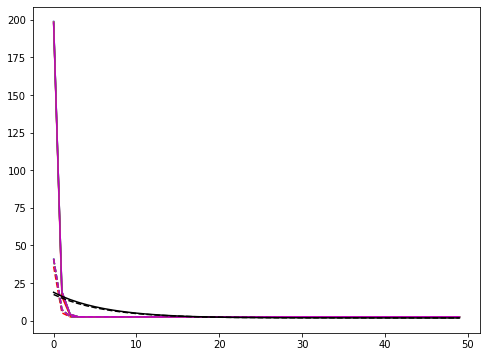

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()